In [104]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ToyotaCorolla.csv")

In [4]:
data.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [7]:
data1 = data.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [8]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [20]:
data2 = data1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis = 1)

In [21]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [31]:
data2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


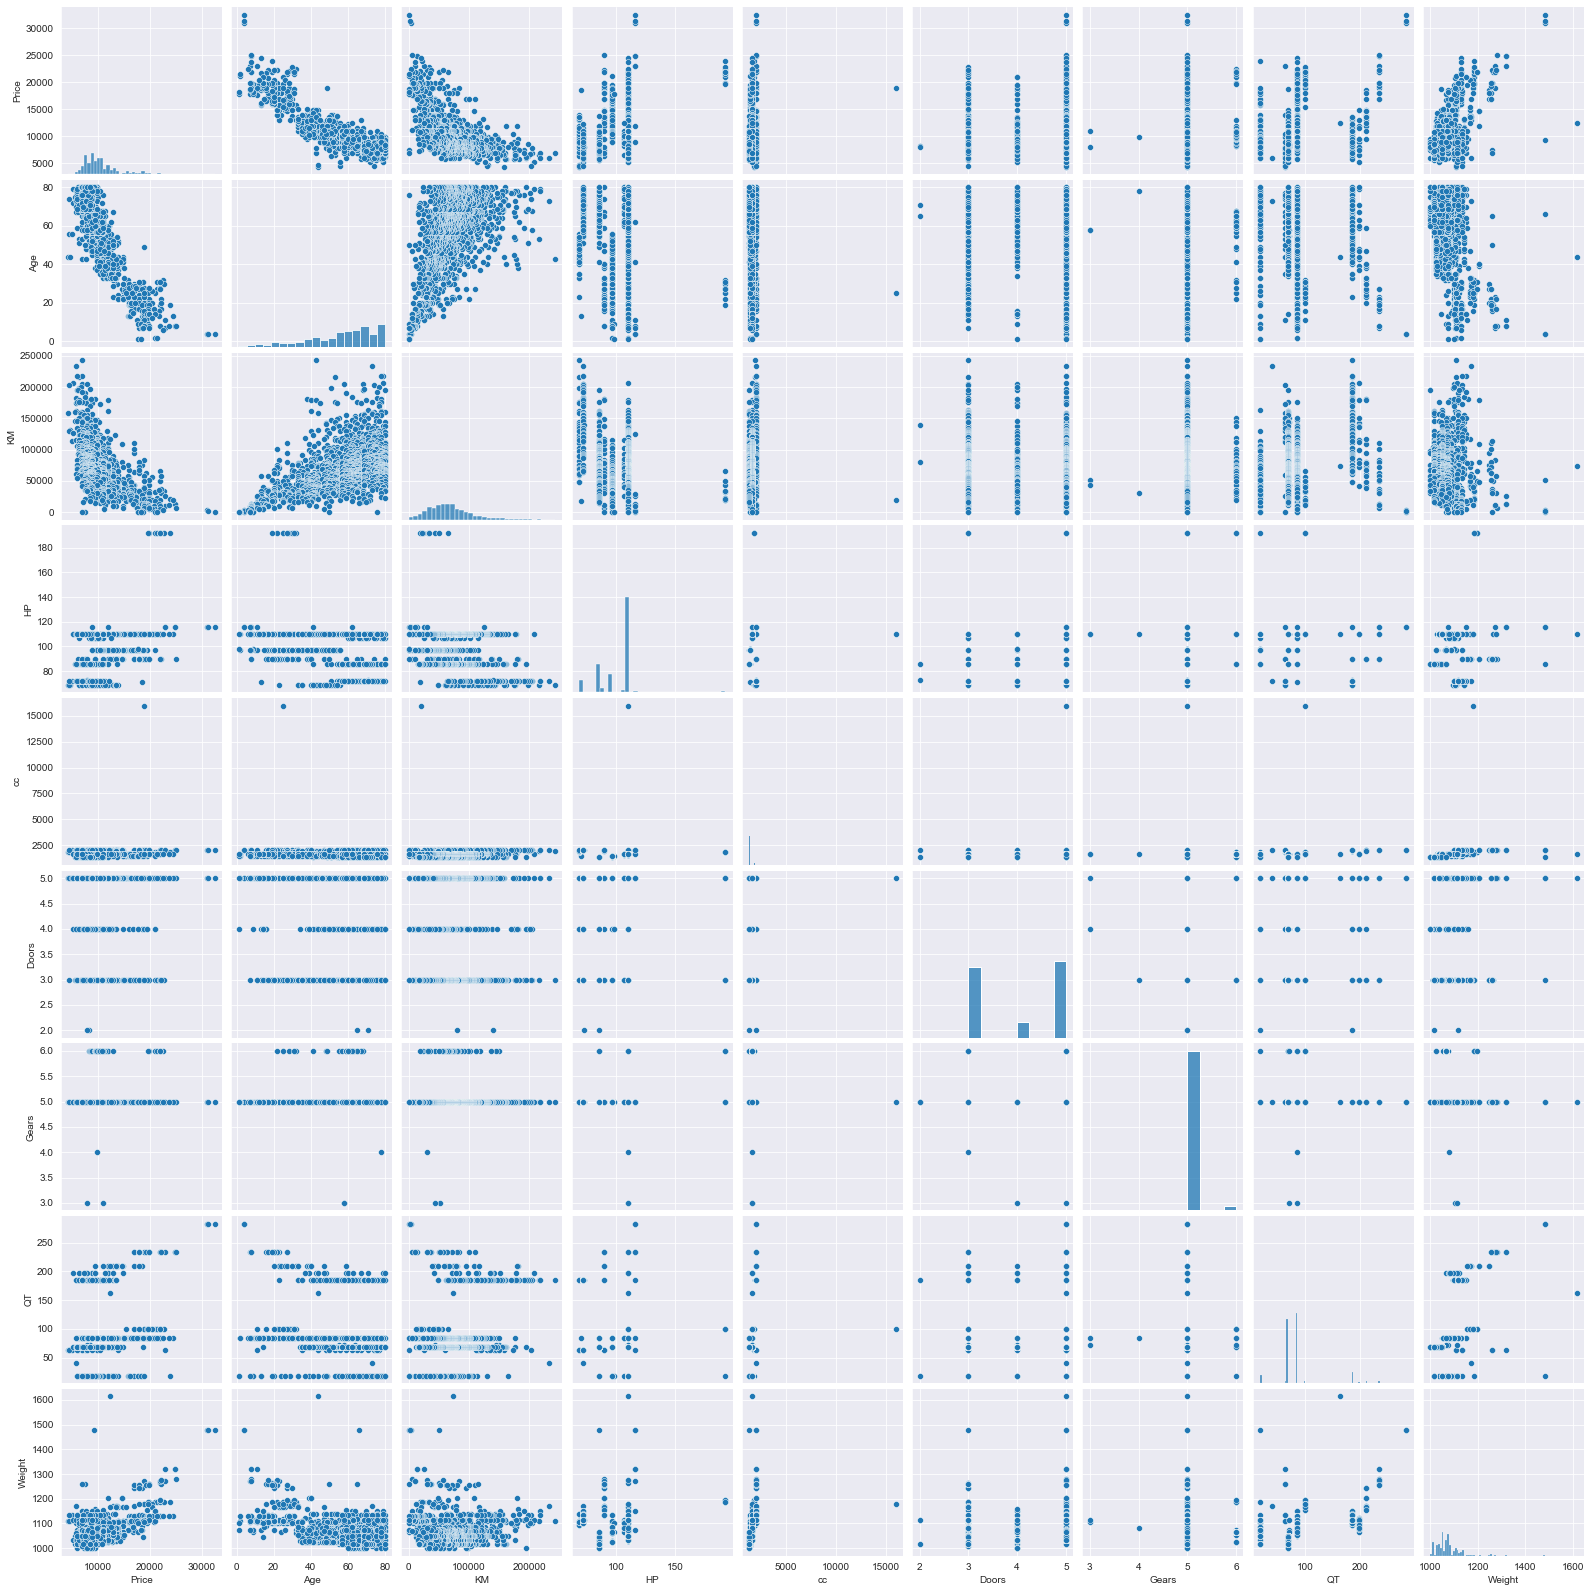

In [32]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data2)

In [106]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data = data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:02:22   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
model_cc = smf.ols('Price~cc',data=data2).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.55e-06
Time:                        21:22:17   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model_d = smf.ols('Price~Doors',data = data2).fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.46e-12
Time:                        21:23:48   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model_c_d = smf.ols('Price~cc+Doors',data=data2).fit()
model_c_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.15e-15
Time:                        21:25:50   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
r_age = smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=data2).fit().rsquared
vif_age = 1/(1-r_age)

r_km = smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=data2).fit().rsquared
vif_km = 1/(1-r_km)

r_cc = smf.ols('cc~Age+HP+KM+Doors+Gears+QT+Weight',data=data2).fit().rsquared
vif_cc = 1/(1-r_cc)

r_doors = smf.ols('Doors~Age+HP+KM+cc+Gears+QT+Weight',data=data2).fit().rsquared
vif_doors = 1/(1-r_doors)

r_gears = smf.ols('Gears~Age+HP+KM+cc+Doors+QT+Weight',data=data2).fit().rsquared
vif_gears = 1/(1-r_gears)

r_QT = smf.ols('QT~Age+HP+KM+cc+Doors+Gears+Weight',data=data2).fit().rsquared
vif_QT = 1/(1-r_QT)

r_weight = smf.ols('Weight~Age+HP+KM+cc+Doors+Gears+QT',data=data2).fit().rsquared
vif_weight = 1/(1-r_weight)

d1 = {'Variables': ['Age','KM','cc','Doors','Gears','QT','Weight'],'VIF':[vif_age,vif_km,vif_cc,vif_doors,vif_gears,vif_QT,vif_weight]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,cc,1.163894
3,Doors,1.156575
4,Gears,1.098723
5,QT,2.311431
6,Weight,2.516420


In [114]:
model1r = model1.resid
model1r

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

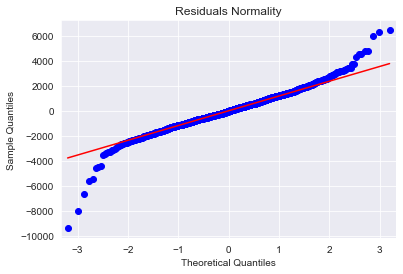

In [115]:
import statsmodels.api as smf
qq_plot = smf.qqplot(model1r , line='q')
plt.title("Residuals Normality")
plt.show()

In [116]:
list(np.where(model1r>6000))

[array([147, 523], dtype=int64)]

In [119]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

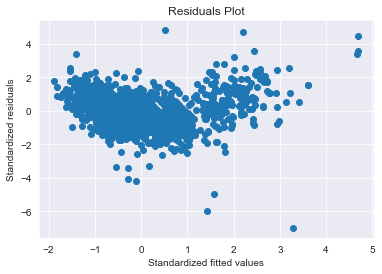

In [121]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))
plt.title("Residuals Plot")
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residuals")
plt.show()

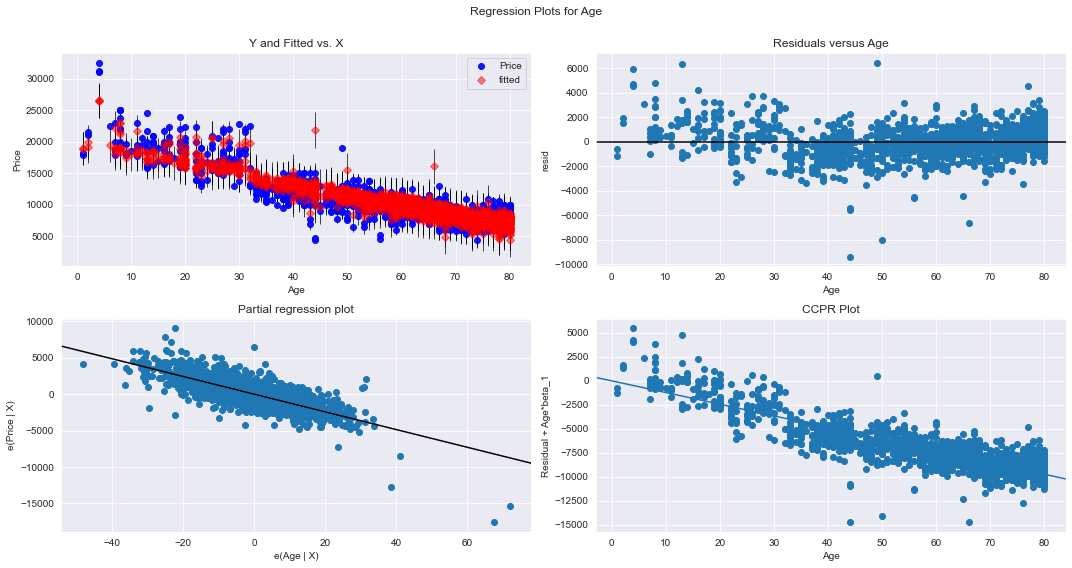

In [123]:

fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"Age",fig=fig)

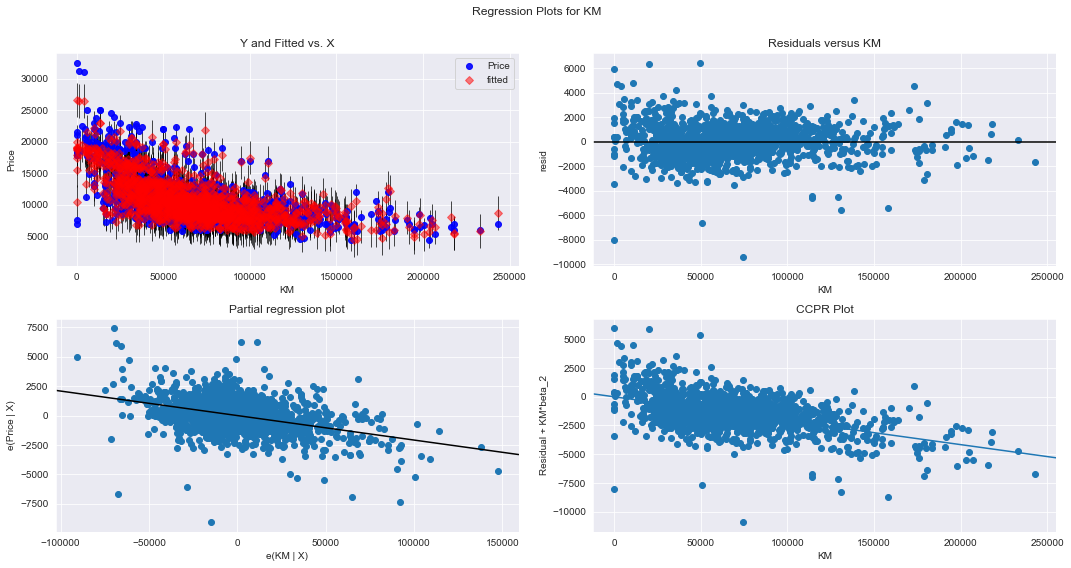

In [124]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"KM",fig=fig)

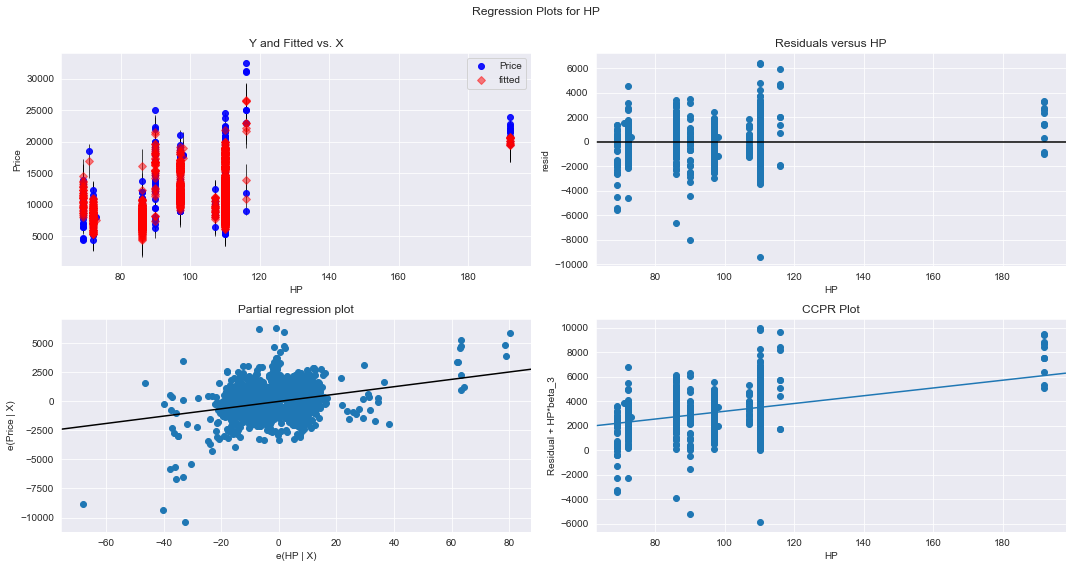

In [125]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"HP",fig=fig)

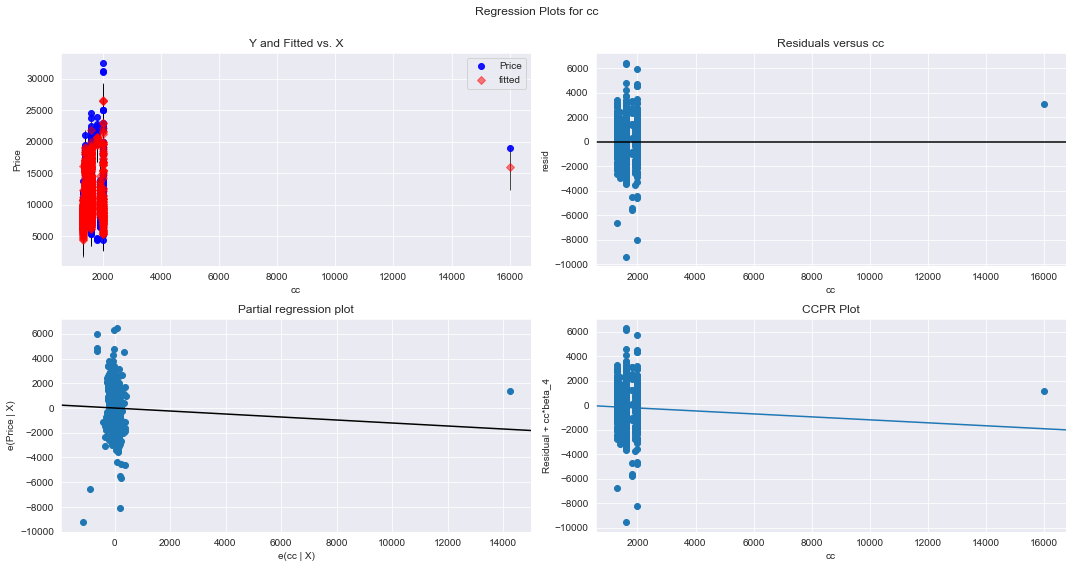

In [126]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"cc",fig=fig)

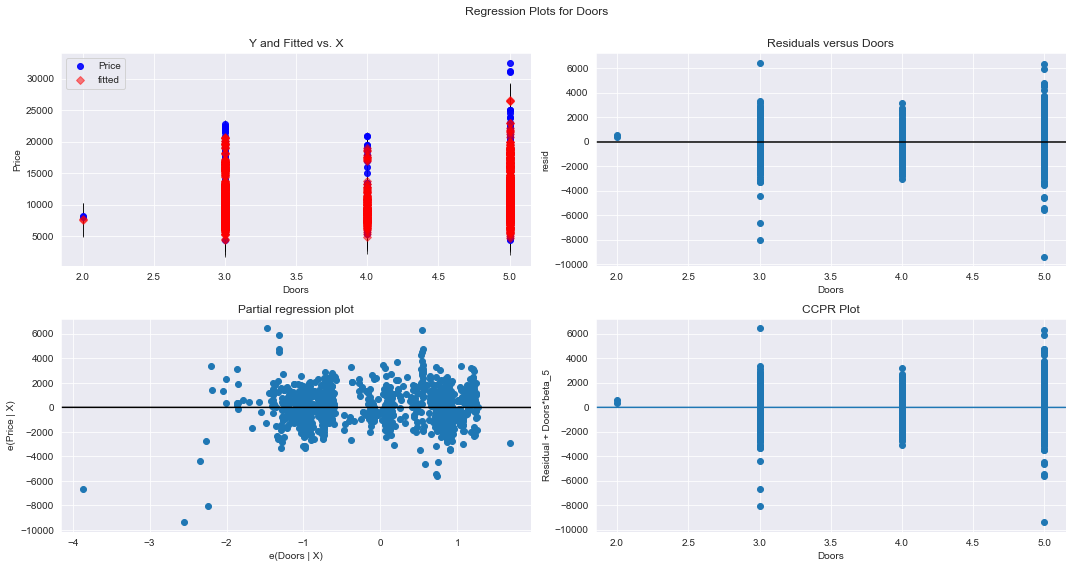

In [127]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"Doors",fig=fig)

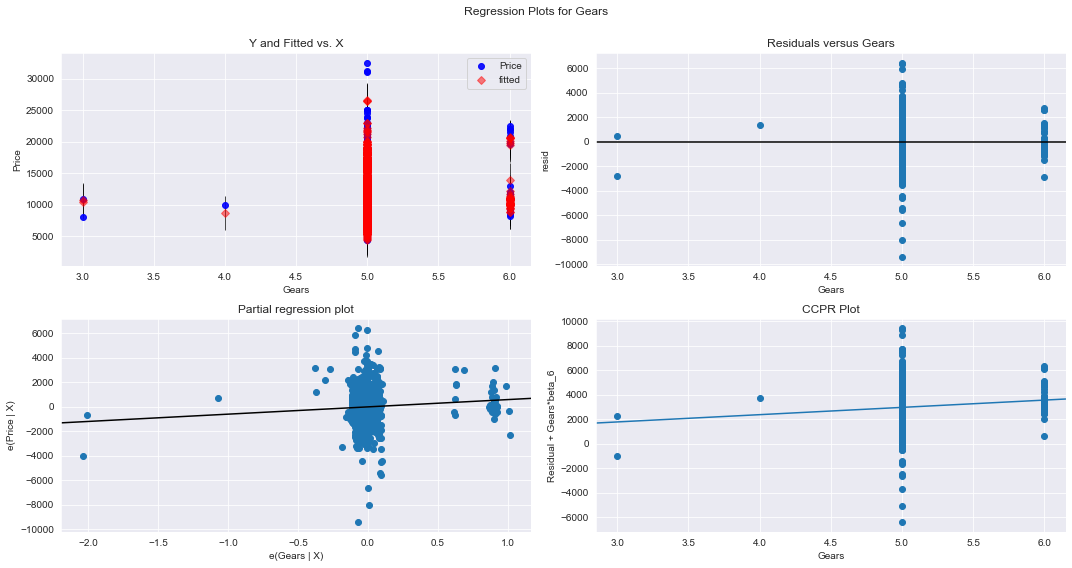

In [128]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"Gears",fig=fig)

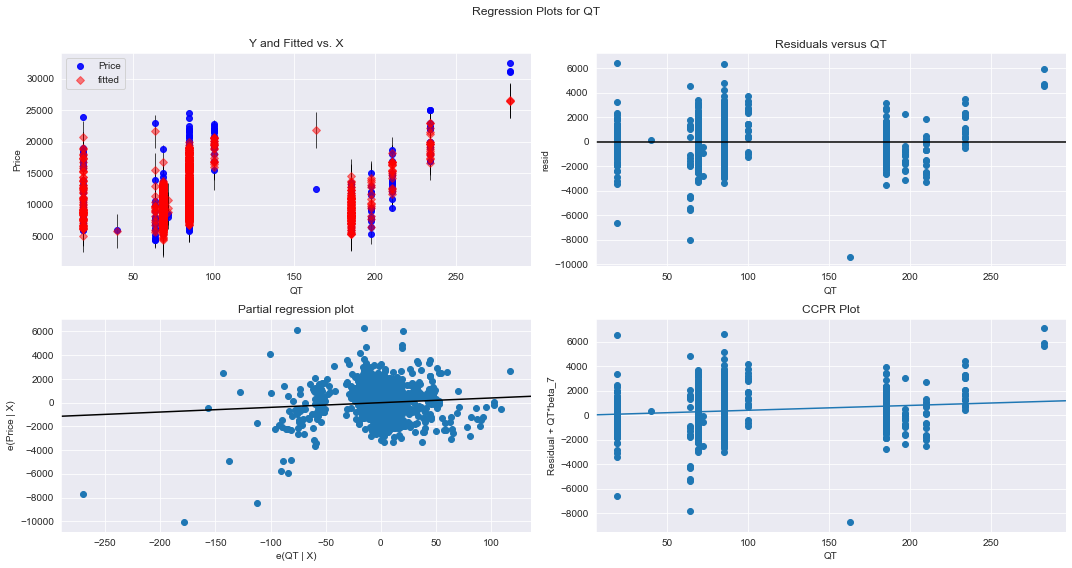

In [129]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"QT",fig=fig)

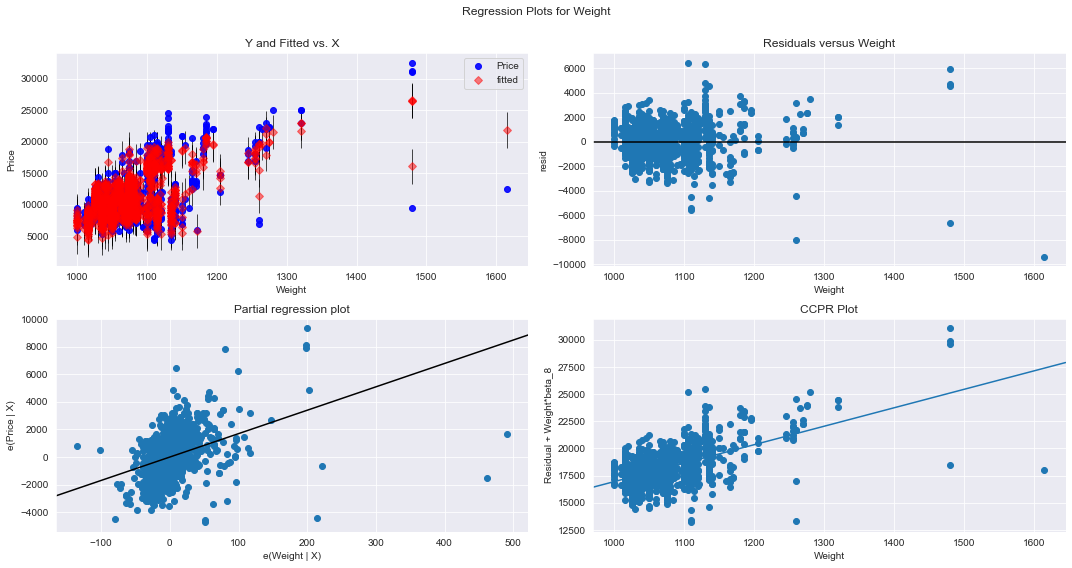

In [130]:
fig = plt.figure(figsize=(15,8))
fig = smf.graphics.plot_regress_exog(model1,"Weight",fig=fig)

In [131]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [132]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

Text(0, 0.5, 'Cooks Distance')

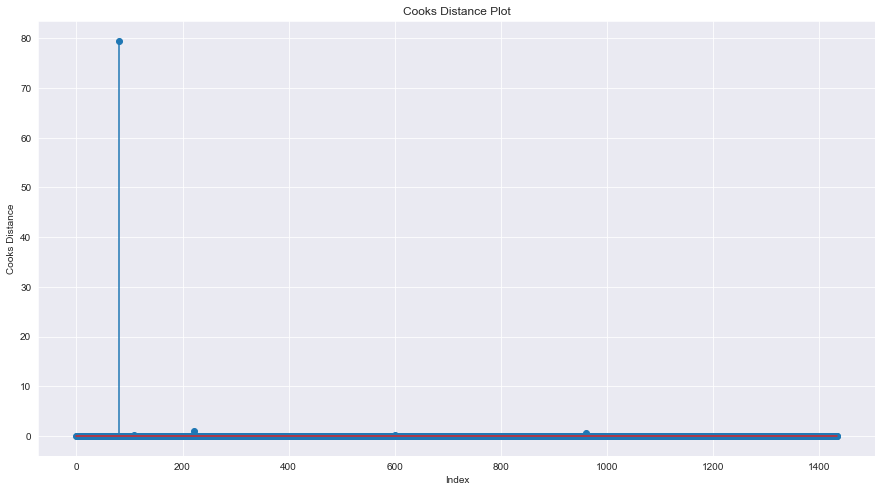

In [133]:
figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [134]:
np.argmax(c),np.max(c)

(80, 79.52010624138055)

In [135]:
from statsmodels.graphics.regressionplots import influence_plot

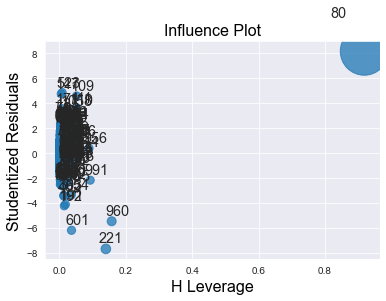

In [137]:
influence_plot(model1)
plt.show()

In [145]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = (3*(k+1)/n)

In [146]:
leverage_cutoff

0.020891364902506964

In [147]:
data2_new = data2.drop(data2.index[[80]],axis = 0).reset_index()

In [148]:
data2_new

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [150]:
data3 = data2_new.drop(['index'],axis=1)

In [151]:
data3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [158]:
import statsmodels.formula.api as smf
final_ml_cc = smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = data3).fit()
final_ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:01   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
Age         -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM            -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP            39.1593      2.898     13.512      0.000      33.474      44.844
cc            -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears        549.7311    189.216      2.905      0.004     178.561     920.902
QT             9.0759      1.424      6.374      0.000       6.283      11.869
Weight        19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
final_ml_d = smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data = data3).fit()
final_ml_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1286.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:01:49   Log-Likelihood:                -12368.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5434.8906   1410.637     -3.853      0.000   -8202.036   -2667.745
Age         -121.6865      2.616    -46.512      0.000    -126.819    -116.554
KM            -0.0209      0.001    -16.737      0.000      -0.023      -0.018
HP            31.3562      2.807     11.170      0.000      25.850      36.863
Doors         -1.0602     40.013     -0.026      0.979     -79.551      77.430
Gears        598.5410    197.089      3.037      0.002     211.925     985.157
QT             3.7658      1.301      2.894      0.004       1.214       6.318
Weight        16.6824      1.056     15.802      0.000      14.612      18.753
==============================================================================
Omnibus:                      146.861   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              959.897
Skew:                          -0.200   Prob(JB):                    3.64e-209
Kurtosis:                       6.987   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
model_influence1 = final_ml_cc.get_influence()
(c1,_)= model_influence1.cooks_distance

In [161]:
c1

array([6.55389760e-03, 3.41592491e-03, 4.77721092e-03, ...,
       2.56004891e-06, 9.44753606e-04, 1.08034832e-02])

Text(0, 0.5, 'Cooks Distance')

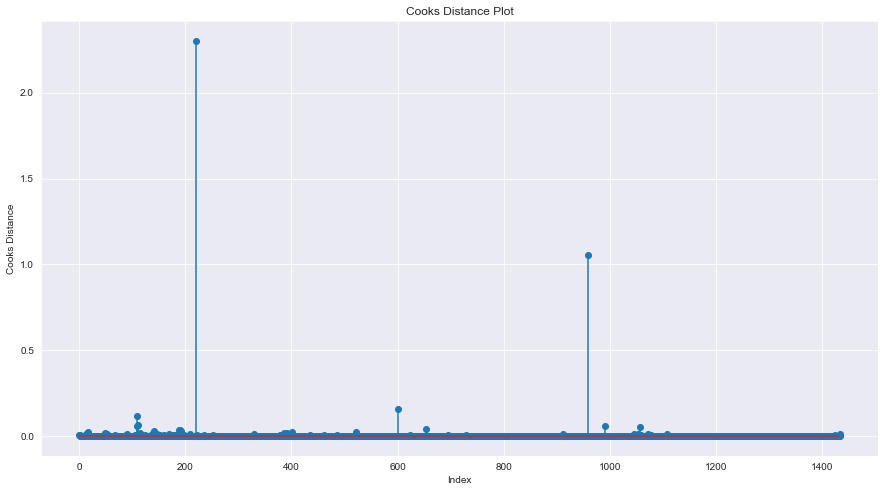

In [162]:
figure = plt.figure(figsize =(15,8))
plt.stem(np.arange(len(data3)),np.round(c1,3))
plt.title("Cooks Distance Plot")
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [163]:
np.argmax(c1),np.max(c1)

(220, 2.3034451664541025)

In [164]:
data3_new = data3.drop(data3.index[[220]],axis = 0).reset_index()

In [165]:
data3_new

,index,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1430,7500,69,20544,86,1300,3,5,69,1025
1430,1431,10845,72,19000,86,1300,3,5,69,1015
1431,1432,8500,71,17016,86,1300,3,5,69,1015
1432,1433,7250,70,16916,86,1300,3,5,69,1015


In [166]:
data4 = data3_new.drop(['index'],axis=1)

In [167]:
data4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [168]:
import statsmodels.formula.api as smf
final_model = smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = data4).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1461.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:13:57   Log-Likelihood:                -12280.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1426   BIC:                         2.462e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1396.680     -7.341      0.000    -1.3e+04   -7513.393
Age         -116.6516      2.510    -46.479      0.000    -121.575    -111.728
KM            -0.0174      0.001    -14.074      0.000      -0.020      -0.015
HP            38.8496      2.806     13.845      0.000      33.345      44.354
cc            -3.1527      0.304    -10.384      0.000      -3.748      -2.557
Gears        547.0112    183.189      2.986      0.003     187.663     906.360
QT             8.0610      1.382      5.832      0.000       5.349      10.773
Weight        24.4820      1.139     21.492      0.000      22.247      26.717
==============================================================================
Omnibus:                      181.376   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.005
Skew:                          -0.277   Prob(JB):                         0.00
Kurtosis:                       7.944   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [169]:
y_pred = final_model.predict(data4)

In [170]:
y_pred

0       16387.000771
1       15935.615378
2       16362.101194
3       16019.408563
4       15840.452818
            ...     
1429     8968.384481
1430     8400.465214
1431     8551.626074
1432     8670.017096
1433    10271.561202
Length: 1434, dtype: float64

In [173]:
new_data=pd.DataFrame({'Age':40,"KM":4500,"HP":120,"Weight":1035,"cc":1700,"Doors": 4,'QT': 70,'Gears':6},index=[1])

In [174]:
final_model.predict(new_data)

1    13490.029588
dtype: float64